In [2]:
import numpy as np
import numpy.linalg as nla
import scipy.constants as sp
import matplotlib.pyplot as mp
%matplotlib inline

## Exercise 6.1: A circuit of resistors

All the resistors have the same resistance $R$. The power rail at the top is at voltage $V_+$ = 5 V. What are the other four voltages, $V_1$ to $V_4$? To answer this question we use Ohm’s law and the Kirchhoff current law, which says that
the total net current flow out of (or into) any junction in a circuit must be zero. Thus for the junction at voltage $V_1$, for instance, we have

\begin{equation}
    \frac{V_1-V_2}{R} + \frac{V_1-V_3}{R} + \frac{V_1-V_4}{R} + \frac{V_1-V_+}{R} = 0
\end{equation}

or equivalently

\begin{equation}
    4V_1 - V_2 - V_3 - V_4 = V_+
\end{equation}

a) Write similar equations for the other three junctions with unknown voltages.

b) Write a program to solve the four resulting equations using Gaussian elimination and hence find the four voltages (or you can modify a program you already have, such as the program gausselim.py in Example 6.1).

\begin{equation}
    4V_1 - V_2 - V_3 - V_4 = V_+
\end{equation}
\begin{equation}
    -V_1 + 3V_2 - V_4 = V_0
\end{equation}
\begin{equation}
    -V_1 + 3V_3 - V_4 = V_+
\end{equation}
\begin{equation}
    -V_1 - V_2 - V_3 + 4V_4 = V_0
\end{equation}

In [20]:
A = np.array([[ 4,  -1,  -1,  -1 ],
              [ -1,  3, 0, -1 ],
              [ -1, 0,  3,  -1 ],
              [ -1, -1,  -1,  4 ]], float)
v = np.array([ 5, 0, 5, 0 ], float)
N = len(v)

# Gaussian elimination
for m in range(N):
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

for i in range(len(x)):
    vstring = "V" + str(i+1)
    print("%s = %.2f V" %(vstring, x[i]))

V1 = 3.00 V
V2 = 1.67 V
V3 = 3.33 V
V4 = 2.00 V


## Exercise 6.2:

a) Modify the program gausselim.py in Example 6.1 to incorporate partial pivoting (or you can write your own program from scratch if you prefer). Run your program and demonstrate that it gives the same answers as the original program when applied to Eq. (6.1)

b) Modify the program to solve the equations in (6.17) and show that it can find the solution to these as well, even though Gaussian elimination without pivoting fails.

## Exercise 6.3:

This exercise invites you to write your own program to solve simultaneous equations using the method of LU decomposition.

a) Starting, if you wish, with the program for Gaussian elimination in Example 6.1 on page 218, write a Python function that calculates the LU decomposition of a matrix. The calculation is same as that for Gaussian elimination, except that at each step of the calculation you need to extract the appropriate elements of the matrix and assemble them to form the lower diagonal matrix $L$ of Eq. (6.32). Test your function by calculating the LU decomposition of the matrix from Eq. (6.2), then multiplying the $L$ and $U$ you get and verifying that you recover the original matrix once more.

b) Build on your LU decomposition function to create a complete program to solve Eq. (6.2) by performing a double backsubstitution as described in this section. Solve the same equations using the function solve from the numpy package and verify that you get the same answer either way.

c) If you’re feeling ambitious, try your hand at LU decompositionwith partial pivoting. Partial pivoting works in the same way for LU decomposition as it does for Gaussian elimination, swapping rows to get the largest diagonal element as explained in Section 6.1.3, but the extension to LU decomposition requires two additional steps. First, every time
you swap two rows you also have to swap the same rows in the matrix $L$. Second, when you use your LU decomposition to solve a set of equations $Ax = v$ you will also need to perform the same sequence of swaps on the vector $v$ on the right-hand side. This means you need to record the swaps as you are doing the decomposition so that you can recreate them later. The simplest way to do this is to set up a list or array in which the value of the $i$th element records the row you swapped with on the ith step of the process. For instance, if you swapped the first row with the second then the second with the fourth, the first two elements of the list would be 2 and 4. Solving a set of equations for given $v$ involves first performing the required sequence of swaps on the elements of $v$ then performing a double backsubstitution as usual. (In ordinary Gaussian elimination with pivoting, one swaps the elements of $v$ as the algorithm proceeds, rather than all at once, but the difference has no effect on the results, so it’s fine to perform all the swaps at once if we wish.)

Modify the function you wrote for part (a) to perform LU decomposition with partial pivoting. The function should return the matrices $L$ and $U$ for the LU decomposition of the swapped matrix, plus a list of the swaps made. Then modify the rest of your program to solve equations of the form $Ax = v$ using LU decomposition with pivoting. Test your program on the example from Eq. (6.17), which cannot be solved without pivoting because of the zero in the first element of the matrix. Check your results against a solution of the same equations using the solve function from numpy.

LU decomposition with partial pivoting is the most widely used method for the solution of simultaneous equations in practice. Precisely this method is used in the function solve from the numpy package. There’s nothing wrong with using the solve function—it’s well written, fast, and convenient. But it does nothing you haven’t already done yourself if you’ve solved this exercise.

In [40]:
A = np.array([[ 2,  1,  4,  1 ],
              [ 3,  4, -1, -1 ],
              [ 1, -4,  1,  5 ],
              [ 2, -2,  1,  3 ]], float)
P, L, U = sla.lu(A)
print("A:")
print(A)
print("\nP:")
print(P)
print("\nL:")
print(L)
print("\nU:")
print(U)
print("\nPA:")
print(np.dot(P,A))
print("\nLU:")
print(np.dot(L,U))

A:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

P:
[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]

L:
[[ 1.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.        ]
 [ 0.66666667  0.3125      1.          0.        ]
 [ 0.66666667  0.875       0.11764706  1.        ]]

U:
[[ 3.          4.         -1.         -1.        ]
 [ 0.         -5.33333333  1.33333333  5.33333333]
 [ 0.          0.          4.25        0.        ]
 [ 0.          0.          0.         -1.        ]]

PA:
[[ 1. -4.  1.  5.]
 [ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 2. -2.  1.  3.]]

LU:
[[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]]


<b>Exercise 6.8</b>

a) Write a python function that takes as its argument a real square matrix A and returns two matrices Q and R that form its QR decomposition

b) Implement the QR algorithm to calculate the eigenvalues and eigenvectors. Continue calculating until the magnitude of all off-diagonal element is less than $10^{-6}$.

In [72]:
def decomp(A):
    N = len(A)
    Q = np.zeros([N,N], dtype=float)
    R = np.zeros([N,N], dtype=float)
    
    for i in range(N):
        summation = 0
        for j in range(i):
            qa = np.dot(Q[:,j], A[:,i])
            summation += qa*Q[:,j]
            R[j,i] = qa
        u = A[:,i] - summation
        unorm = nla.norm(u)
        q = u/unorm
        
        Q[:,i] = q
        R[i,i] = unorm
    return (Q,R)

A = np.array([
    [1, 4, 8, 4],
    [4, 2, 3, 7],
    [8, 3, 6, 9],
    [4, 7, 9, 2],
], dtype=float)

N = len(A)
V = np.identity(N)
epsilon = 1e-6
offdiag = np.logical_not(np.identity(N))
while (np.abs(A*offdiag) < epsilon).all() == False:
    Q,R = decomp(A)
    A = np.dot(R,Q)
    V = np.dot(V,Q)
    
print(np.diagonal(A))

[ 21.  -8.  -3.   1.]


## Exercise 6.9: Asymmetric quantum well


In [67]:
def V(x):
    L = 5e-10
    for m in range(11):
        for n in range(11):
            pot = x*np.sin(np.pi*m*x/L)*np.sin(np.pi*n*x/L)
    return pot


<b>Exercise 6.10:</b>

Consider the equation $x = 1 − e^{−cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

a) Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{−6}$.

b) Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01 and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime in which $x$ = 0 to a regime of nonzero $x$. This is another example of a phase transition. In physics this transition is known as the percolation transition; in epidemiology it is the epidemic threshold.

In [12]:
def relax(acc):
    relaxlist = []
    x = 1.
    xprev = 1.
    err = 1.
    while err > acc:
        x = 1 - np.exp(-2*x)
        err = (abs(x-xprev))/xprev
        relaxlist.append(x)
        xprev = x
    return relaxlist[-1]

relax(1e-6)

0.79681263111184575

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


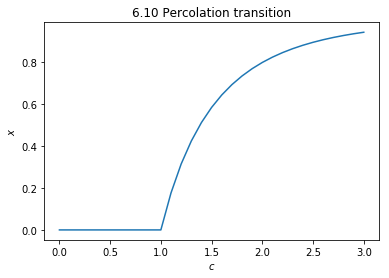

In [50]:
def relax_mod(c):
    relaxlist = []
    x = 1.
    xprev = 1.
    err = 1.
    acc = 1e-6
    while err > acc:
        x = 1 - np.exp(-c*x)
        err = (abs(x-xprev))/xprev
        relaxlist.append(x)
        xprev = x
    return relaxlist[-1]

x = np.arange(0.,3.1,0.1)
y = []
for c in x:
    y.append(relax_mod(c))
mp.plot(x,y)
mp.xlabel("$c$")
mp.ylabel("$x$")
mp.title("6.10 Percolation transition")
mp.show()

<b>Exercise 6.11: Overrelaxation</b>

a) Derive an equivalent of Eq. (6.81) for the overrelaxation method and hence show that the error on $x′$, the equivalent of Eq. (6.83), is given by

\begin{equation}
    \epsilon ' \approx \frac{x-x'}{1-\frac{1}{(1+\omega)f'(x)-\omega}}
\end{equation}

b) Consider again the equation $x = 1 − e^{−cx}$ that we solved in Exercise 6.10. Take the program you wrote for part (a) of that exercise, which solved the equation for the case $c$ = 2, and modify it to print out the number of iterations it takes to converge to a solution accurate to $10^{−6}$.


c) Now write a new program (or modify the previous one) to solve the same equation $x = 1 − e^{−cx}$ for $c$ = 2, again to an accuracy of $10^{−6}$, but this time using overrelaxation. Have your program print out the answers it finds along with the number of iterations it took to find them. Experiment with different values of ω to see how fast you can get the method to converge. A value of $\omega$ = 0.5 is a reasonable starting point. With some trial and error you should be able to get the calculation to converge about twice as fast as the simple relaxation method, i.e., in about half as many iterations.

d) Are there any circumstances under which using a value $\omega$ < 0 would help us find a solution faster than we can with the ordinary relaxation method? (Hint: The answer is yes, but why?)

In [71]:
def relax_iter(c):
    relaxlist = []
    x = 1.
    xprev = 1.
    err = 1.
    acc = 1e-6
    while err > acc:
        x = 1 - np.exp(-c*x)
        err = (abs(x-xprev))/xprev
        relaxlist.append(x)
        xprev = x
    return print("Number of iterations:",len(relaxlist))
relax_iter(2)

Number of iterations: 14


In [103]:
def f(x):
    return 1 - np.exp(-2*x)

def df(x):
    return 2*np.exp(-2*x)

def overrelax(w):
    relaxlist = []
    x = 1.
    xprev = 1.
    err = 1.
    acc = 1e-6
    while err > acc:
        Dx = f(x) - x
        x = x + (1 + w)*Dx
        err = abs((xprev - x)/(1-1/((1+w)*df(x)-w)))
        relaxlist.append(x)
        xprev = x
    print("Final value of x =", relaxlist[-1])
    print("Number of iterations =", len(relaxlist))

overrelax(0.5)

Final value of x = 0.796812372983
Number of iterations = 4


<b>Exercise 6.14:</b>

Consider a square potential well of width $w$, with walls of height $V$.

a) For an electron (mass 9.1094 $\times$ $10^{−31}$ kg) in a well with $V$ = 20 eV and $w$ = 1 nm, write a Python program to plot the three quantities

\begin{equation}
        y_1 = \tan \sqrt{\frac{w^2 mE}{2\hbar^2}}
\end{equation}
\begin{equation}
        y_2 = \sqrt{\frac{V-E}{E}}
\end{equation}
\begin{equation}
        y_3 = -\sqrt{\frac{E}{V-E}}
\end{equation}

on the same graph, as a function of $E$ from $E$ = 0 to $E$ = 20 eV. From your plot make approximate estimates of the energies of the first six energy levels of the particle.

b) Write a second program to calculate the values of the first six energy levels in electron volts to an accuracy of 0.001 eV using binary search.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


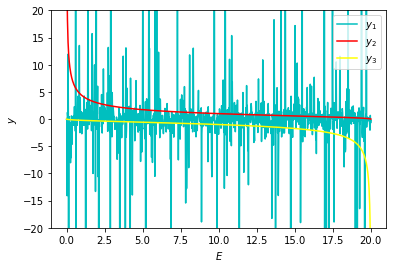

In [137]:
V = 20
w = 1e-9

def y1(E):
    return np.tan(np.sqrt(w*w*sp.electron_mass*E/(2*sp.hbar**2)))

def y2(E):
    return np.sqrt((V-E)/E)

def y3(E):
    return -np.sqrt(E/(V-E))

E = np.linspace(0,20,1000)
mp.plot(E,y1(E), "c", label="$y_1$")
mp.plot(E,y2(E), "r", label="$y_2$")
mp.plot(E,y3(E), color="yellow", label="$y_3$")
mp.xlabel("$E$")
mp.ylabel("$y$")
mp.ylim(-20,20)
mp.legend()
mp.show()